<a id='section5'></a>
# Index
1. [***Checking Packages***](#section1)
2. [***Notebook content***](#section2)
3. [***Importing and Exporting data***](#section3)   
4. [***Saving notebooks***](#section4)

----------------   

----------------    

<a id='section1'></a>
## ***(1) Checking Packages***
##### [back to top](#section5)

In [1]:
# Which version of Python is installed?
import sys
print(sys.version)

2.7.11 |Anaconda 2.5.0 (64-bit)| (default, Dec  6 2015, 18:08:32) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [2]:
# Which package versions are installed?
import pip
all_packages = pip.get_installed_distributions()
used_packages = ['pandas', 'numpy','matplotlib','neo','ipython']

for entry in used_packages:
    for p in all_packages:
        if entry in str(p):
            print(str(p))


pandas 0.17.1
numpy 1.10.4
matplotlib 1.5.1
neo 0.3.3
ipython-genutils 0.1.0
ipython 4.1.1


<a id='section2'></a>
## ***(2) Notebook content***
##### [back to top](#section5)

### ***a. Markdown***

### a list
* one
* two 
* three

### some links
[a website ... PubMed](https://www.ncbi.nlm.nih.gov/pubmed/)   
[another notebook](R_Statistics.ipynb) ... statistical analysis using R


### ***b. Raw text***

### ***c. Headings***

# ... first level heading

## ... second level heading

### ... third level heading

### ***d. Code***

In [3]:
#This is code
x = 1
x

1

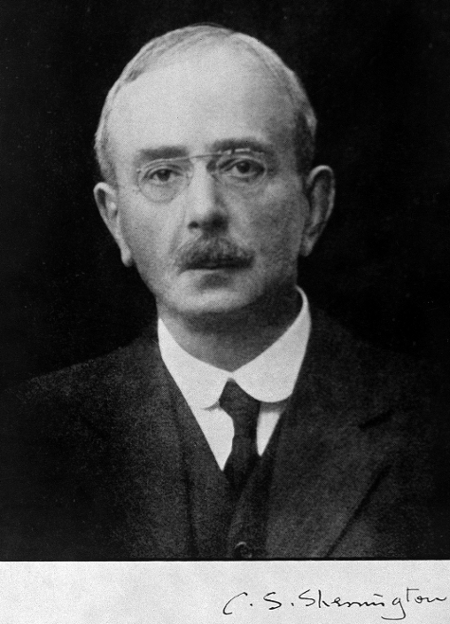

In [4]:
# using python code to import an image
from IPython.display import Image
Image(filename='DATA_FILES/Sherrington.jpg')
# Credit: Wellcome Library, London
# http://wellcomeimages.org
# Copyrighted work available under Creative Commons Attribution only licence 
# CC BY 4.0 http://creativecommons.org/licenses/by/4.0

In [5]:
# using python code to display a website
from IPython.display import IFrame
IFrame('https://www.ncbi.nlm.nih.gov/pubmed/?term=Python+software', width=800, height=400)

<a id='section3'></a>
## ***(3) Importing and Exporting data***
##### [back to top](#section5)

### ***a. text files***

In [6]:
# import the Python module
import pandas as pd

# import CSV File containing heart rate variability in shrews at 3 times points (EKG0, EKG1, EKG2; within-subjects)
# and under five conditions (0, 0.3, 1, 5, and 10; between-subjects)
Text = pd.read_csv('DATA_FILES/Test.csv')
Text

,Animal,Cond,EKG0,EKG1,EKG2
0,1,0.0,0.001582,0.001250,0.004771
1,2,0.0,0.002241,0.000957,0.002176
2,3,0.0,0.003509,0.002070,0.003817
3,4,0.0,0.002534,0.002672,0.004091
4,5,0.3,0.003734,0.019703,0.004989
5,6,0.3,0.003500,0.003510,0.002919
6,7,0.3,0.001603,0.002776,0.001818
7,8,0.3,0.000919,0.002925,0.003184
8,9,1.0,0.002388,0.000761,0.000165
9,10,1.0,0.001320,0.000971,0.000025


In [7]:
# make a directory if it does not exist
import os
if not os.path.exists("OUTPUT_FILES/"):
    os.makedirs("OUTPUT_FILES/")

# export data as an Excel spreadsheet
Text.to_excel('OUTPUT_FILES/test.xls')

### ***b. Electrophysiology signals***

In [8]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import neo

# use a plottign style in the notebook that is similar to ggplot2, see http://ggplot2.org/
plt.style.use('ggplot')
# plot the output of matplotlib commands in the notebook
%matplotlib inline

# import a Spike2 file (CED)
filename='DATA_FILES/nerve_signal.smr'; r= neo.Spike2IO(filename)
bl = r.read()[0]; asig = bl.segments[0].analogsignals[0]
# keep the signal as a 16 bit float
asig = np.float16(asig)
# adjust for amplifier gain (in this example it is 20,000 and signals are microvolts)
asig = asig * 50 
pts = float(np.prod(asig.shape)); secs = pts/20000.0; mins = secs/60.0; hrs = mins/60
print('{}:\n===================='.format(filename.split('/')[-1]))
print('{} data points\n{} sec\n{} min\n{} hr\n20,000 Hz'.format(
    pts, secs, mins, hrs))

nerve_signal.smr:
600976.0 data points
30.0488 sec
0.500813333333 min
0.00834688888889 hr
20,000 Hz


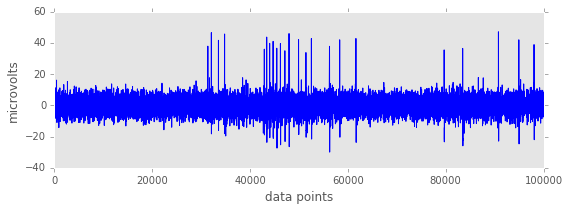

In [9]:
# plot data
# limit the time range
begin = 0; end = 100000
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(asig, 'b') # b = blue
ax.set_xlabel('data points', fontsize=12)
ax.set_ylabel('microvolts', fontsize=12)
ax.set_xlim(begin,end)
plt.grid()
plt.tight_layout()

In [10]:
# save data to an HDF5 file type to share
# first remove any previously created files from running this cell
import os
try:
    os.remove("OUTPUT_FILES/nerve_signal.h5")
except OSError:
    pass
# use a start and end time in seconds (to select different parts of the file)
start = 0; end = 20; newfilename = "OUTPUT_FILES/nerve_signal.h5"
# convert sec to pts using the sampling rate (20,000); adjust to match your files
start1 = start * 20000; end1 = end * 20000
# create the new array
new_asig = asig[start1:end1]
# Write a new Block>Segment>AnalogSignal Hierarchy from the ground up
# make a segment
seg = neo.Segment(); seg.name = 'New segment'
seg.description = 'Sample'; seg.index = 0
seg.analogsignals = []; seg.analogsignals.append(new_asig)
# make a recording channel
rec = neo.RecordingChannel(); rec.analogsignals = []
rec.analogsignals.append(new_asig)
# make a recording channel group
recg = neo.RecordingChannelGroup(); recg.recordingchannels = []
recg.recordingchannels.append(rec); recg.name = 'New group'
# make a block ... finally!
b = neo.Block(); b.name = 'New block'
b.segments = []; b.segments.append(seg)
b.recordingchannelgroups = []; b.recordingchannelgroups.append(recg)
# Write the block to a new HDF5 file:
w = neo.io.NeoHdf5IO(newfilename)
w.write_block(b)
w.close()

<a id='section4'></a>
## ***(4) Saving notebooks***
##### [back to top](#section5)

In [11]:
# grabbing the name of the current notebook and printing the name
# if the print statement does not work, rerun the code for the following 3 cells

In [12]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NotebookName = '" + IPython.notebook.notebook_name + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [13]:
print(NotebookName)

Content_types.ipynb


In [14]:
## Saving the notebook to html and moving to directory
import os
import subprocess
subprocess.call('jupyter nbconvert '+NotebookName,shell=True)

0